In [ ]:
#Koneksi ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, re, glob, cv2, numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

dirs = os.listdir('/content/drive/My Drive/Dataset/')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/My Drive/Dataset/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(224,224))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah kupu_harimau_kuning_hijau : 100
Jumlah kupu_raja_helena : 100
Jumlah kupu_hijau_biru : 100
Jumlah kupu_batik_cap : 100
Jumlah kupu_jarak : 100
Jumlah kupu_raja_limau : 100
Jumlah kupu_jojo : 100
Jumlah kupu_pantat_merah : 95


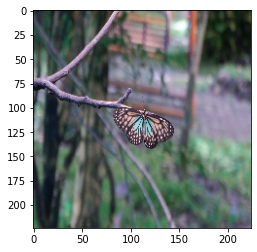

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train, 8)
y_test = to_categorical(y_test, 8)
y_train.shape

(532, 8)

In [ ]:
len(y_test)

263

In [ ]:
print(label)

8


In [ ]:
print(lb_arr)

['kupu_harimau_kuning_hijau', 'kupu_raja_helena', 'kupu_hijau_biru', 'kupu_batik_cap', 'kupu_jarak', 'kupu_raja_limau', 'kupu_jojo', 'kupu_pantat_merah']


In [ ]:
# https://github.com/jymenon/CNN-Architecture/blob/master/CNN%20Architecture%20-%20%20LeNet-5%20CNN%20with%20Keras.ipynb

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [ ]:
# model.build()
# model.summary()

In [ ]:
adam = Adam(lr=5e-4)
epochs = 10
lrate = 0.01
decay = lrate/epochs
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 48)      38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 48)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 134832)            0         
                                                                 
 dense (Dense)               (None, 256)               3

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# reduce_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.2, min_lr=1e-6)

In [ ]:
pip install torchvision 

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import mnist
import torch
import torchvision

MODEL_DIR = "/content/drive/My Drive/LeNet/temp"

if not os.path.exists(MODEL_DIR):  #If the directory does not exist, create it.
    os.makedirs(MODEL_DIR)
checkpoint = ModelCheckpoint(filepath = os.path.join(MODEL_DIR, "model-{epoch:02d}.h5"),
                             save_best_only=True)

history = model.fit(X_train, y_train, epochs=epochs, batch_size=8, validation_data=(X_test, y_test), callbacks=[checkpoint])
scores = model.evaluate(X_test, y_test, verbose=1)

path = F"/content/drive/My Drive/LeNet/temp/" 
model.save(path, 'my_model.h5')

print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
67/67 [==============================] - 81s 1s/step - loss: 5.1389e-06 - accuracy: 1.0000 - val_loss: 0.3468 - val_accuracy: 0.9582
Epoch 2/10
67/67 [==============================] - 78s 1s/step - loss: 4.8678e-06 - accuracy: 1.0000 - val_loss: 0.3469 - val_accuracy: 0.9582
Epoch 3/10
67/67 [==============================] - 79s 1s/step - loss: 4.6000e-06 - accuracy: 1.0000 - val_loss: 0.3469 - val_accuracy: 0.9582
Epoch 4/10
67/67 [==============================] - 76s 1s/step - loss: 4.3564e-06 - accuracy: 1.0000 - val_loss: 0.3481 - val_accuracy: 0.9582
Epoch 5/10
67/67 [==============================] - 76s 1s/step - loss: 4.1221e-06 - accuracy: 1.0000 - val_loss: 0.3495 - val_accuracy: 0.9582
Epoch 6/10
67/67 [==============================] - 76s 1s/step - loss: 3.8987e-06 - accuracy: 1.0000 - val_loss: 0.3507 - val_accuracy: 0.9582
Epoch 7/10
67/67 [==============================] - 76s 1s/step - loss: 3.6930e-06 - accuracy: 1.0000 - val_loss: 0.3511 - val_accuracy:

In [ ]:
model_json=model.to_json()
with open("/content/drive/My Drive/LeNet/temp/model.json","w") as file:
    file.write(model_json)
model.save_weights("/content/drive/My Drive/LeNet/temp/my_model.h5")
print("Model berhasil disimpan !! ")

Model berhasil disimpan !! 


In [ ]:
from tensorflow.keras.models import model_from_json
json_file = open('/content/drive/My Drive/LeNet/temp/model.json','r')
loaded_model_json = json_file.read()
json_file.close()

load_model = model_from_json(loaded_model_json)
load_model.load_weights("/content/drive/My Drive/LeNet/temp/my_model.h5")

print("Loadded!")

Loadded!


In [ ]:
load_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 48)      38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 48)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 134832)            0         
                                                                 
 dense (Dense)               (None, 256)               3

In [ ]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

print('\nTest accuracy:', test_acc)

9/9 [==============================] - 7s 737ms/step - loss: 0.3429 - accuracy: 0.9582

Test accuracy: 0.9581748843193054


In [ ]:
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=1)

print('\nTrain accuracy:', train_acc)

17/17 [==============================] - 14s 794ms/step - loss: 9.7573e-06 - accuracy: 1.0000

Train accuracy: 1.0


In [ ]:
#Graph drawing
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

<Figure size 432x288 with 0 Axes>

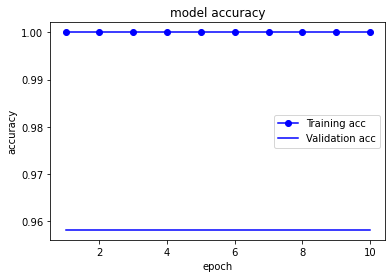

In [ ]:
plot_epochs = range(1, len(acc)+1)
# Accuracy
plt.plot(plot_epochs, acc, 'bo-', label='Training acc')
plt.plot(plot_epochs, val_acc, 'b', label='Validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

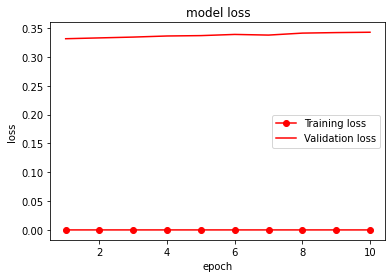

In [ ]:
plot_epochs = range(1, len(loss)+1)
# Accuracy
plt.plot(plot_epochs, loss, 'ro-', label='Training loss')
plt.plot(plot_epochs, val_loss, 'r', label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, 
                            target_names=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"]))

                           precision    recall  f1-score   support

kupu_harimau_kuning_hijau       1.00      0.97      0.99        39
         kupu_raja_helena       0.96      0.82      0.88        28
          kupu_hijau_biru       0.97      1.00      0.98        32
           kupu_batik_cap       0.97      1.00      0.99        37
               kupu_jarak       1.00      0.97      0.98        32
          kupu_raja_limau       0.92      1.00      0.96        33
                kupu_jojo       1.00      0.87      0.93        30
        kupu_pantat_merah       0.86      1.00      0.93        32

                 accuracy                           0.96       263
                macro avg       0.96      0.95      0.95       263
             weighted avg       0.96      0.96      0.96       263



In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([6, 6, 0, 5, 0, 7, 3, 6, 5, 6, 0, 2, 6, 0, 3, 3, 2, 6, 7, 6, 4, 5,
       6, 7, 7, 0, 2, 3, 5, 7, 2, 0, 5, 7, 0, 0, 6, 3, 7, 3, 1, 2, 1, 6,
       5, 5, 4, 4, 6, 4, 2, 1, 7, 5, 3, 3, 3, 7, 1, 1, 4, 4, 6, 3, 2, 5,
       0, 5, 3, 0, 5, 1, 7, 0, 0, 1, 5, 5, 6, 7, 7, 1, 0, 0, 5, 3, 7, 4,
       3, 1, 3, 7, 4, 7, 6, 6, 7, 5, 0, 7, 1, 4, 0, 1, 0, 2, 3, 7, 2, 7,
       4, 4, 0, 0, 7, 1, 2, 4, 2, 2, 4, 7, 1, 7, 2, 2, 2, 0, 2, 3, 6, 7,
       0, 6, 4, 7, 7, 4, 6, 4, 2, 5, 4, 2, 0, 5, 7, 3, 5, 3, 3, 0, 3, 4,
       5, 5, 4, 7, 5, 3, 2, 4, 3, 4, 3, 0, 1, 5, 3, 3, 7, 7, 1, 3, 2, 4,
       0, 4, 6, 7, 6, 6, 2, 2, 3, 0, 6, 3, 2, 6, 6, 3, 2, 5, 2, 0, 7, 5,
       4, 3, 2, 1, 0, 5, 1, 0, 0, 7, 3, 3, 4, 1, 0, 5, 1, 0, 6, 1, 2, 5,
       5, 1, 4, 5, 1, 5, 0, 3, 7, 0, 5, 4, 5, 2, 2, 2, 3, 3, 1, 5, 5, 4,
       7, 4, 0, 4, 1, 6, 0, 2, 7, 4, 2, 2, 5, 3, 0, 5, 3, 3, 0, 7, 7])

In [ ]:
y_test_class = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.9581749049429658


array([[38,  1,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  1,  0,  0,  3,  0,  1],
       [ 0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 26,  4],
       [ 0,  0,  0,  0,  0,  0,  0, 32]])

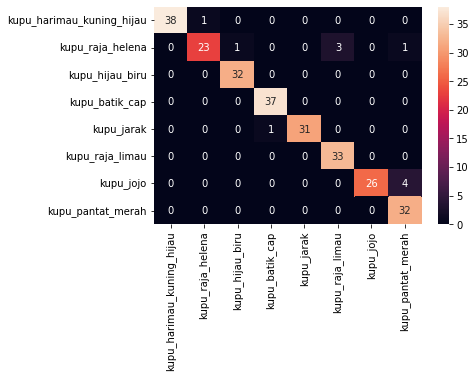

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"], 
           yticklabels=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"])

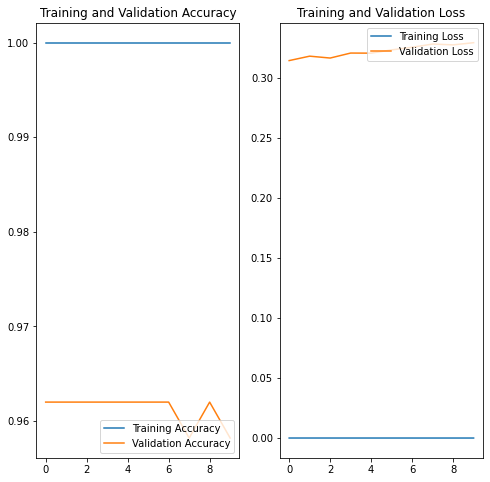

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()